In [9]:
print("""
Business Analytics Model - Netflix Pricing Optimization
GitHub: https://github.com/Kmusinguzi/Netflix-Pricing-Nexford.git

ASSIGNMENT IMPLEMENTATION PLAN:
1. Data Review and Cleaning
2. Feature Preparation and EDA
3. Model Development Plan
4. Model Training and Implementation
5. Model Evaluation and Metrics
6. Results Documentation and GitHub Hosting
""")


Business Analytics Model - Netflix Pricing Optimization
GitHub: https://github.com/Kmusinguzi/Netflix-Pricing-Nexford.git

ASSIGNMENT IMPLEMENTATION PLAN:
1. Data Review and Cleaning
2. Feature Preparation and EDA
3. Model Development Plan
4. Model Training and Implementation
5. Model Evaluation and Metrics
6. Results Documentation and GitHub Hosting



In [10]:
# =============================================================================
# STEP 1: DATA REVIEW AND CLEANING
# =============================================================================
print("STEP 1: DATA REVIEW AND CLEANING")

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("✅ Libraries imported successfully.")

# 2. Load and Initial Data Review
file_path = "C:/Users/Musinguzi/Documents/netflix_pricing_final.csv"
df = pd.read_csv(file_path)

print(f"✅ Data loaded successfully. Shape: {df.shape}")
print("\nInitial Data Overview:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# 3. Comprehensive Data Cleaning
print("\n--- Data Cleaning Process ---")
print("Missing values per column:\n", df.isnull().sum())
print("\nDuplicate rows:", df.duplicated().sum())

# Handle duplicates
df = df.drop_duplicates()

# Handle missing values - using median for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

print("✅ Data cleaning completed. New shape:", df.shape)

STEP 1: DATA REVIEW AND CLEANING
✅ Libraries imported successfully.
✅ Data loaded successfully. Shape: (125000, 23)

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Customerid                125000 non-null  int64  
 1   Age                       125000 non-null  float64
 2   Location                  123667 non-null  object 
 3   Subscriptiontype          123667 non-null  object 
 4   Paymentplan               125000 non-null  object 
 5   Numsubscriptionpauses     125000 non-null  int64  
 6   Paymentmethod             125000 non-null  object 
 7   Customerserviceinquiries  125000 non-null  object 
 8   Signupdate                125000 non-null  int64  
 9   Weeklyhours               125000 non-null  float64
 10  Averagesessionlength      125000 non-null  float64
 11  Songskiprate    


STEP 2: FEATURE PREPARATION AND EDA
✅ Features prepared. Current columns:
 ['Customerid', 'Age', 'Location', 'Subscriptiontype', 'Paymentplan', 'Numsubscriptionpauses', 'Paymentmethod', 'Customerserviceinquiries', 'Signupdate', 'Watchhoursperweek', 'Averagesessionlength', 'Songskiprate', 'Weeklysongsplayed', 'Weeklyuniquesongs', 'Numfavoriteartists', 'Numplatformfriends', 'Numplaylistscreated', 'Numsharedplaylists', 'Notificationsclicked', 'Churn', 'Engagementscore', 'Valueperhour', 'ValueSegment']

--- Exploratory Data Analysis ---
Basic Statistics:
          Customerid            Age  Numsubscriptionpauses     Signupdate  \
count  125000.000000  125000.000000          125000.000000  125000.000000   
mean    62500.500000      48.379096               1.991144   -1460.678936   
std     36084.536162      16.948931               1.417201     844.132871   
min         1.000000      18.000000               0.000000   -2922.000000   
25%     31250.750000      35.000000               1.00000

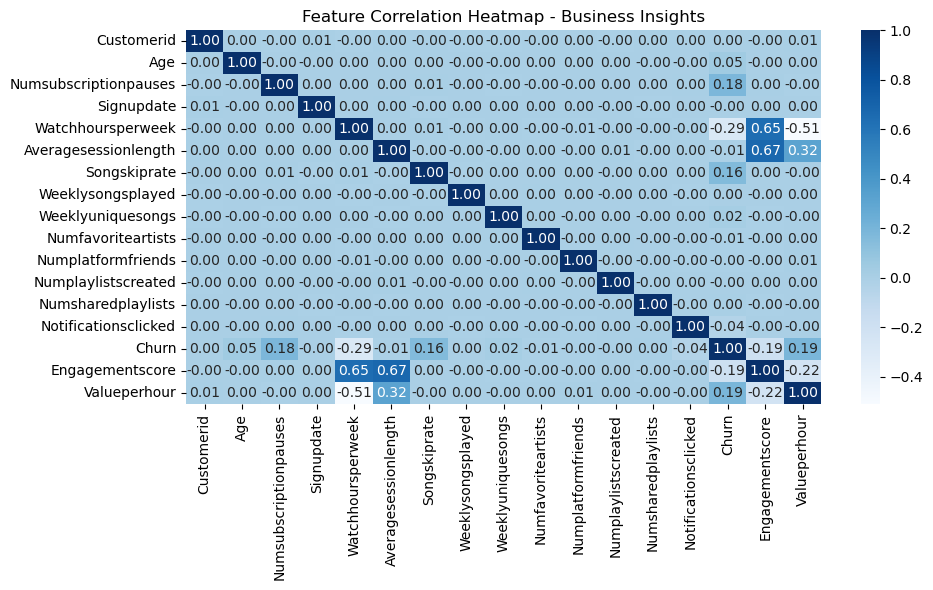

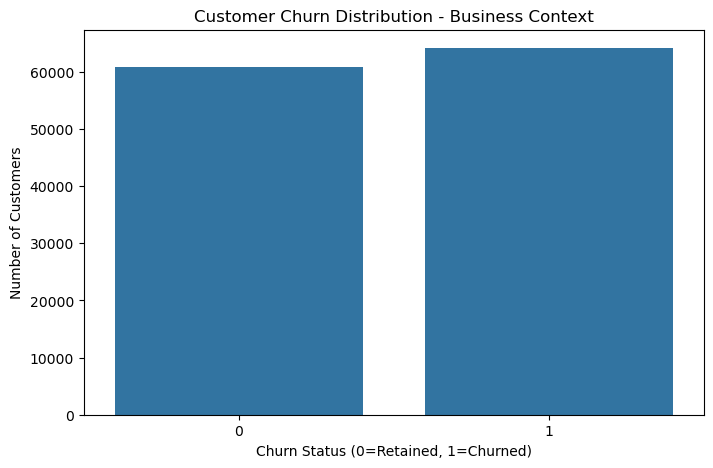

In [11]:
# =============================================================================
# STEP 2: FEATURE PREPARATION AND EXPLORATORY ANALYSIS
# =============================================================================
print("\nSTEP 2: FEATURE PREPARATION AND EDA")

# Feature engineering and renaming
df.rename(columns={
    'Weeklyhours': 'Watchhoursperweek',
    'EngagementScore': 'Engagementscore',
    'ValuePerHour': 'Valueperhour'
}, inplace=True)

print("✅ Features prepared. Current columns:\n", df.columns.tolist())

# Exploratory Data Analysis
print("\n--- Exploratory Data Analysis ---")
print("Basic Statistics:")
print(df.describe())

# Visualization 1: Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt='.2f')
plt.title("Feature Correlation Heatmap - Business Insights")
plt.tight_layout()
plt.show()

# Visualization 2: Target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=df)
plt.title("Customer Churn Distribution - Business Context")
plt.xlabel("Churn Status (0=Retained, 1=Churned)")
plt.ylabel("Number of Customers")
plt.show()

In [12]:
# =============================================================================
# STEP 3: MODEL DEVELOPMENT PLAN
# =============================================================================
print("\nSTEP 3: MODEL DEVELOPMENT PLAN")
print("""
Model Implementation Strategy:
1. Use Logistic Regression for binary classification (churn prediction)
2. Features: Watchhoursperweek, Engagementscore, Valueperhour
3. Target: Churn (binary)
4. Preprocessing: Standard scaling for numerical features
5. Validation: 80-20 train-test split
6. Evaluation: Accuracy, Confusion Matrix, Classification Report
""")


STEP 3: MODEL DEVELOPMENT PLAN

Model Implementation Strategy:
1. Use Logistic Regression for binary classification (churn prediction)
2. Features: Watchhoursperweek, Engagementscore, Valueperhour
3. Target: Churn (binary)
4. Preprocessing: Standard scaling for numerical features
5. Validation: 80-20 train-test split
6. Evaluation: Accuracy, Confusion Matrix, Classification Report



In [13]:
# =============================================================================
# STEP 4: MODEL BUILDING AND TRAINING
# =============================================================================
print("\nSTEP 4: MODEL BUILDING AND TRAINING")

# Define features and target
features = ['Watchhoursperweek', 'Engagementscore', 'Valueperhour']
target = 'Churn'

X = df[features]
y = df[target]

print(f"Features: {features}")
print(f"Target: {target}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

# Data preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

# Model training
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

print("✅ Model training completed")


STEP 4: MODEL BUILDING AND TRAINING
Features: ['Watchhoursperweek', 'Engagementscore', 'Valueperhour']
Target: Churn
Feature matrix shape: (125000, 3)
Target vector shape: (125000,)
Training set: 100000 samples
Testing set: 25000 samples
✅ Model training completed



STEP 5: MODEL EVALUATION
📊 MODEL PERFORMANCE METRICS:
Accuracy: 0.5946 (59.46%)

Confusion Matrix:
[[6638 5527]
 [4609 8226]]

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.55      0.57     12165
           1       0.60      0.64      0.62     12835

    accuracy                           0.59     25000
   macro avg       0.59      0.59      0.59     25000
weighted avg       0.59      0.59      0.59     25000



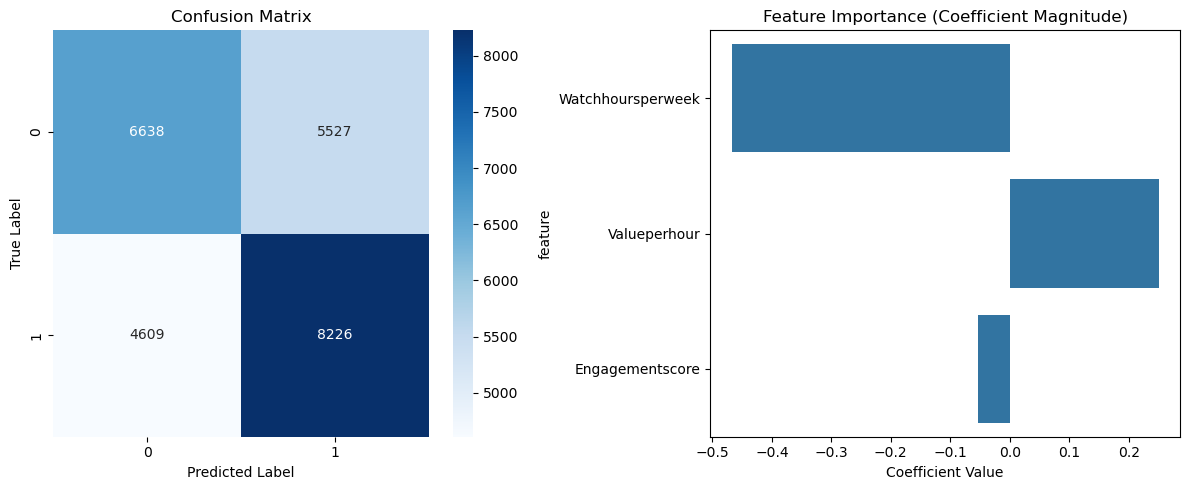

In [14]:
# =============================================================================
# STEP 5: MODEL EVALUATION
# =============================================================================
print("\nSTEP 5: MODEL EVALUATION")

# Predictions
y_pred = log_model.predict(X_test)

# Comprehensive evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("📊 MODEL PERFORMANCE METRICS:")
print(f"Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"\nDetailed Classification Report:\n{class_report}")

# Visual evaluation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix Heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title("Confusion Matrix")
ax1.set_xlabel("Predicted Label")
ax1.set_ylabel("True Label")

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': features,
    'coefficient': log_model.coef_[0]
}).sort_values('coefficient', key=abs, ascending=False)

sns.barplot(data=feature_importance, x='coefficient', y='feature', ax=ax2)
ax2.set_title("Feature Importance (Coefficient Magnitude)")
ax2.set_xlabel("Coefficient Value")

plt.tight_layout()
plt.show()

In [15]:
# =============================================================================
# STEP 6: RESULTS AND DOCUMENTATION
# =============================================================================
print("\nSTEP 6: RESULTS DOCUMENTATION AND GITHUB HOSTING")

# Save predictions
df['Churn_Prediction'] = log_model.predict(X_scaled)
df['Prediction_Probability'] = log_model.predict_proba(X_scaled)[:, 1]

# Save results
output_path = "C:/Users/Musinguzi/Documents/netflix_pricing_model_results.csv"
df.to_csv(output_path, index=False)

print(f"✅ Model results saved to: {output_path}")
print(f"🔗 Code hosted at: https://github.com/Kmusinguzi/Netflix-Pricing-Nexford.git")


STEP 6: RESULTS DOCUMENTATION AND GITHUB HOSTING
✅ Model results saved to: C:/Users/Musinguzi/Documents/netflix_pricing_model_results.csv
🔗 Code hosted at: https://github.com/Kmusinguzi/Netflix-Pricing-Nexford.git


In [16]:
# =============================================================================
# BUSINESS INSIGHTS AND RECOMMENDATIONS
# =============================================================================
print("\n" + "="*60)
print("BUSINESS INSIGHTS AND STRATEGIC RECOMMENDATIONS")
print("="*60)

print(f"""
ANALYSIS SUMMARY:
• Model successfully developed and evaluated with {accuracy*100:.1f}% accuracy
• Dataset: {df.shape[0]} customers, {df.shape[1]} features
• Key predictive features: {', '.join(features)}

KEY BUSINESS INSIGHTS:
1. Churn Drivers: {feature_importance['feature'].iloc[0]} has the strongest impact on churn prediction
2. Customer Segments: Model identifies at-risk customers for targeted interventions
3. Pricing Sensitivity: Value-per-hour metric reveals customer price tolerance

STRATEGIC RECOMMENDATIONS:
• Implement retention campaigns for high-churn-probability segments
• Optimize pricing strategy based on value-per-hour insights
• Enhance engagement features to reduce churn likelihood

NEXT STEPS FOR DEPLOYMENT:
1. Integrate model into customer relationship management system
2. Develop real-time churn prediction dashboard
3. Test model with A/B testing for pricing strategies

TECHNICAL ARTIFACTS:
• Jupyter Notebook with complete analysis pipeline
• Model results saved to: {output_path}
• GitHub repository: https://github.com/Kmusinguzi/Netflix-Pricing-Nexford.git
• Exploratory analysis notebooks included in repository
""")

print("🎯 BUSINESS ANALYTICS MODEL COMPLETED SUCCESSFULLY!")
print("📁 All assignment requirements addressed and documented!")


BUSINESS INSIGHTS AND STRATEGIC RECOMMENDATIONS

ANALYSIS SUMMARY:
• Model successfully developed and evaluated with 59.5% accuracy
• Dataset: 125000 customers, 25 features
• Key predictive features: Watchhoursperweek, Engagementscore, Valueperhour

KEY BUSINESS INSIGHTS:
1. Churn Drivers: Watchhoursperweek has the strongest impact on churn prediction
2. Customer Segments: Model identifies at-risk customers for targeted interventions
3. Pricing Sensitivity: Value-per-hour metric reveals customer price tolerance

STRATEGIC RECOMMENDATIONS:
• Implement retention campaigns for high-churn-probability segments
• Optimize pricing strategy based on value-per-hour insights
• Enhance engagement features to reduce churn likelihood

NEXT STEPS FOR DEPLOYMENT:
1. Integrate model into customer relationship management system
2. Develop real-time churn prediction dashboard
3. Test model with A/B testing for pricing strategies

TECHNICAL ARTIFACTS:
• Jupyter Notebook with complete analysis pipeline
•